# BLM19412E Introduction to Data Mining

Name Surname: Saliha Gönül

Dataset Definiton : Belirli şehirlerde bulunan dairelerin fiyatlarını bedroom, bathroom gibi featurelarına göre tahmin etmemizi sağlar.

Dataset Source : https://www.kaggle.com/datasets/shree1992/housedata?select=data.csv

Aim of the Project : Projenin amacı verilen özelliklere göre şehirlerde bulunan dairelerin fiyatlarının belirlenmesi.

### Step0: Project Proposal 

##### a) Find project dataset.

House price prediction
https://www.kaggle.com/datasets/shree1992/housedata?select=data.csv

##### b) Explain, why you have chosen to work on this dataset?


Bu veri seti ile emlak piyasalarının işini kolaylaştıracak tahminler yapılabilir. Emlak fiyatlarının tahmini herkes için daha önemli hale gelmektedir. Emlak fiyatları, hem genel piyasa durumunun hem de bir ülkenin ekonomik sağlığının iyi bir göstergesidir. Bu yüzden de bu veri setindeki bilgiler doğrultusunda evlerin özelliklerine göre fiyatlarının tahmin edilmesi sağlanacaktır.

##### c) Do basic pre-processing and exploratory data analysis (EDA) to understand your data.

Veri setinin daha iyi analiz edebilmemiz için veri seti üzerinde basic pre-processing adımları uygulamamız gerekir. 

In [554]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv") # seçtiğim veri setini okuma işlemi yapıyorum.

In [555]:
df.head(4) # veri setinin ilk 4 satırını yazdırıyorum ki sütunlarının nasıl olduğunu göreyim.

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,1955.0,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650.0,9050.0,2.0,0.0,4.0,5.0,3370.0,280.0,NaN,0.0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,NaN,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,1966.0,0.0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963.0,0.0,857 170th Pl NE,Bellevue,WA 98008,USA


In [556]:
type(df) # veri setinin türünü bulmak için bu metodu kullanıyorum

pandas.core.frame.DataFrame

In [557]:
df.dtypes # her kolonun içerdiği verilerin veri türleri hakkında bilgilenmemizi sağlayan metot

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
street            object
city              object
statezip          object
country           object
dtype: object

In [558]:
df.info() # her kolondaki veri sayısını gösterir. Buna göre veri setimiz içerisinde hiç null değer olmadığını görürüz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4594 non-null   float64
 2   bedrooms       4595 non-null   float64
 3   bathrooms      4592 non-null   float64
 4   sqft_living    4590 non-null   float64
 5   sqft_lot       4593 non-null   float64
 6   floors         4594 non-null   float64
 7   waterfront     4597 non-null   float64
 8   view           4597 non-null   float64
 9   condition      4597 non-null   float64
 10  sqft_above     4596 non-null   float64
 11  sqft_basement  4591 non-null   float64
 12  yr_built       4594 non-null   float64
 13  yr_renovated   4596 non-null   float64
 14  street         4599 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4587 non-null   object 
dtypes: float

In [559]:
df.isna() # null değerleri bulmak için isna kullanılır. false null değer yok anlamına gelmektedir.

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [560]:
df.shape # datasetinin satır ve sütun sayısını öğrenmek için shape kullanıyorum.

(4600, 18)

In [561]:
df.sample(5)  # random olarak dataset içerisinden 5 satırı yazdırıyorum

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
740,2014-05-15 00:00:00,695000.000000,4.0,3.00,3150.0,9130.0,2.0,0.0,0.0,3.0,3150.0,0.0,2001.0,0.0,24038 SE 13th Pl,Sammamish,WA 98075,USA
4459,2014-06-05 00:00:00,592105.714286,3.0,2.50,1640.0,29970.0,2.0,0.0,0.0,3.0,1640.0,0.0,1992.0,0.0,3040 273rd Ave NE,Redmond,WA 98053,USA
3229,2014-06-24 00:00:00,457500.000000,3.0,2.25,1430.0,2003.0,2.0,0.0,0.0,3.0,980.0,450.0,1996.0,0.0,1362 31st Ave S,Seattle,WA 98144,USA
614,2014-05-13 00:00:00,322500.000000,3.0,2.00,1350.0,14200.0,1.0,0.0,0.0,3.0,1350.0,0.0,1989.0,0.0,14405 274th Ct NE,Duvall,WA 98019,USA
1796,2014-06-03 00:00:00,475000.000000,3.0,2.50,2600.0,7210.0,2.0,0.0,0.0,3.0,2600.0,0.0,1989.0,0.0,5054 NE 23rd St,Renton,WA 98059,USA


In [562]:
df.columns # bu metotla dataset içerisindeki sütunlara bakıyorum

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [563]:
df.describe() # int veri türündeki kolonlardaki five number summary ve min max hesaplamalarını bu metotla yapabiliryorum.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.594000e+03,4595.000000,4592.000000,4590.000000,4.593000e+03,4594.000000,4597.000000,4597.000000,4597.000000,4596.000000,4591.000000,4594.000000,4596.000000
mean,5.520972e+05,3.402176,2.160279,2139.356427,1.486399e+04,1.512516,0.007179,0.240809,3.452034,1826.975849,311.813330,1970.794297,809.312010
std,5.641704e+05,0.908143,0.783430,963.922330,3.591013e+04,0.538326,0.084431,0.778634,0.677352,862.306371,464.268346,29.713952,979.549998
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.226250e+05,3.000000,1.750000,1460.000000,5.001000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.550000e+05,4.000000,2.500000,2620.000000,1.100500e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,605.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [564]:
# istenilen durumlarda da her kolon için ayrıca hesaplamalar yapılabilir. Örneğin bathroom kolonu için ortalama hesaplayalım.
df.bathrooms.mean()

2.1602787456445993

In [565]:
# istersekte tüm int veri türündeki kolonları ortalamasını tek bir for döngüsü ile ayrı ayrı yapabilriz.
for col in df.columns[1:]:
    if df[col].dtype == 'int64':
        print(f"{col} kolonunun mean değeri: {df[col].mean()}")

In [566]:
for col in df.columns[1:]:
    if df[col].dtype == 'int64':
        print(f"{col} kolonunun medyan değeri: {df[col].median()}")

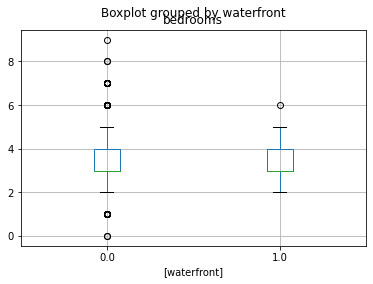

In [567]:
boxplot = df.boxplot(column=['bedrooms'], by=['waterfront']) 
# veri setimde waterfront olup olmama durumuna gre bedrooms sayısına bakıyroum.

<AxesSubplot:>

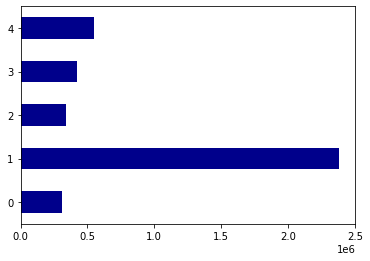

In [568]:
df.price[:5].plot(kind="barh", color='darkblue')  # ilk 5 satırı alarak price kolonunu grafikte gösteriyorum

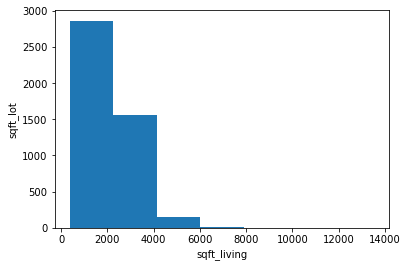

In [569]:
plt.xlabel("sqft_living") # yaşanılacak evin m2 bilgisi
plt.ylabel("sqft_lot") # genel m2 bilgisi
bins = plt.hist(df['sqft_living'], bins=7)

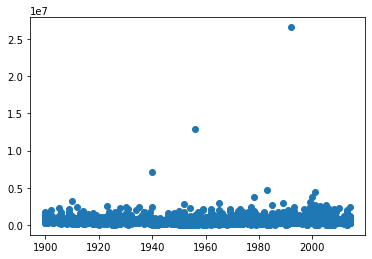

In [570]:
plt.scatter(df['yr_built'], df['price']) # scatter plot ile yapım tılı ve fiyat ilişkisini gözlemledim.
# görüldüğü üzere burada outlier değerler mevcut

In [571]:
df.price.max() # max price buldum buna göre bir dağılım grafiği çizeceğim
# 26 milyon

26590000.0

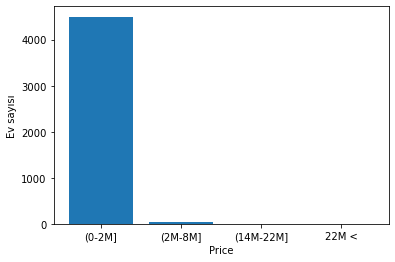

In [572]:
count = [len(df[(df['price'] > 0) & (df['price'] <= 2000000)]),
             len(df[(df['price'] > 2000000) & (df['price'] <= 8000000)]),
             len(df[(df['price'] > 14000000) & (df['price'] <= 22000000)]),
             len(df[(df['price'] > 22000000)])]
# fiyat aralıkları belirliyorum

label = ['(0-2M]', '(2M-8M]', '(14M-22M]', '22M <']

plt.xlabel("Price")
plt.ylabel("Ev sayısı")
plt.bar(label, count)
plt.show()

# bu sonuca göre 4600 evden (Satır) grafiğe göre görnüşü olarak %97 lik bir kısmı 0-2M aralığındadır.

##### d) Briefly explain your aim. Which data mining approaches do you use (at least 2) and why?

Amacım evlerin konumlarına, m2'lerine, oda sayılarına ve daha bir çok özelliklerine bakarak fiyat tahmini yapabilmek. Bu yüzden veri setim üzerinden Classification işlemi yapacağım.

### Step1: Exploratory Data Analysis (EDA)

##### a) Explain the shape of the dataset

In [573]:
type(df) # datesetin türü

pandas.core.frame.DataFrame

In [574]:
len(df) # datasetin uzunluğu yani satır sayısı

4600

In [575]:
df.shape # datasetin shapei yani satır sütun boyutu

(4600, 18)

In [576]:
len(df.index) #datasetin satır sayısı

4600

##### b) Explain the features types in the dataset. Explain in detail if there are any problems?

Bu dataset içerisinde 4600 satır 18 sütun vardır yani feature.

- date: ilan tarihi

- price: evin fiyatı

- bedrooms: yatak odası sayısı

- bathrooms: banyo sayısı

- sqft_living: yaşanabilecek m2

- sqft_lot: genel m2

- floors: kat sayısı

- waterfront: sahil olup olmama durumu (1/0)

- view: görüş,cephe sayısı

- condition: durum, şart

- sqft_above: çatı katı m2

- sqft_basement: bodrum m2

- yr_built: yapım yılı

- yr_renovated: yenileme yılı

- street: cadde

- city: şehir

- statezip: zipcode

- country: ülke

In [577]:
df.columns # dataset içerisinde bulunan featuruların adları

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [578]:
df.dtypes # her featurenın türü

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
street            object
city              object
statezip          object
country           object
dtype: object

In [579]:
df.info() # her bir kolondaki non-null değer sayısı ve türü;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4594 non-null   float64
 2   bedrooms       4595 non-null   float64
 3   bathrooms      4592 non-null   float64
 4   sqft_living    4590 non-null   float64
 5   sqft_lot       4593 non-null   float64
 6   floors         4594 non-null   float64
 7   waterfront     4597 non-null   float64
 8   view           4597 non-null   float64
 9   condition      4597 non-null   float64
 10  sqft_above     4596 non-null   float64
 11  sqft_basement  4591 non-null   float64
 12  yr_built       4594 non-null   float64
 13  yr_renovated   4596 non-null   float64
 14  street         4599 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4587 non-null   object 
dtypes: float

In [580]:
df.values # her satıra ait featureların değerlerinin bir arrayde gösterilmesi

array([['2014-05-02 00:00:00', 313000.0, 3.0, ..., 'Shoreline',
        'WA 98133', 'USA'],
       ['2014-05-02 00:00:00', 2384000.0, 5.0, ..., 'Seattle',
        'WA 98119', 'USA'],
       ['2014-05-02 00:00:00', 342000.0, 3.0, ..., 'Kent', 'WA 98042',
        'USA'],
       ...,
       ['2014-07-09 00:00:00', 416904.166667, 3.0, ..., 'Renton',
        'WA 98059', 'USA'],
       ['2014-07-10 00:00:00', 203400.0, 4.0, ..., 'Seattle', 'WA 98178',
        'USA'],
       ['2014-07-10 00:00:00', 220600.0, 3.0, ..., 'Covington',
        'WA 98042', nan]], dtype=object)

In [581]:
df.describe() # sayısal olan kolonlar hakkında daha çok bilgi shibi olmak için bazı işlemler

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.594000e+03,4595.000000,4592.000000,4590.000000,4.593000e+03,4594.000000,4597.000000,4597.000000,4597.000000,4596.000000,4591.000000,4594.000000,4596.000000
mean,5.520972e+05,3.402176,2.160279,2139.356427,1.486399e+04,1.512516,0.007179,0.240809,3.452034,1826.975849,311.813330,1970.794297,809.312010
std,5.641704e+05,0.908143,0.783430,963.922330,3.591013e+04,0.538326,0.084431,0.778634,0.677352,862.306371,464.268346,29.713952,979.549998
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.226250e+05,3.000000,1.750000,1460.000000,5.001000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.550000e+05,4.000000,2.500000,2620.000000,1.100500e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,605.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


##### c) Explain the distribution of some important features in your dataset using visualizations.

In [582]:
# öncelikle bir korelasyon matrisi oluşturcağım
cor_Df = df.corr()
cor_Df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200148,0.326563,0.430499,0.050407,0.151667,0.135633,0.228555,0.034793,0.367477,0.210275,0.024121,-0.028897
bedrooms,0.200148,1.000000,0.545470,0.594524,0.068457,0.177586,-0.003636,0.111333,0.024290,0.484251,0.333672,0.142672,-0.061449
bathrooms,0.326563,0.545470,1.000000,0.761061,0.108165,0.486990,0.076411,0.212614,-0.119832,0.689976,0.297272,0.463212,-0.214946
sqft_living,0.430499,0.594524,0.761061,1.000000,0.210464,0.345568,0.117659,0.311441,-0.062430,0.876820,0.447597,0.288217,-0.122299
sqft_lot,0.050407,0.068457,0.108165,0.210464,1.000000,0.005278,0.017203,0.073792,0.001018,0.216367,0.034956,0.050792,-0.022933
floors,0.151667,0.177586,0.486990,0.345568,0.005278,1.000000,0.021987,0.031099,-0.274463,0.523526,-0.255962,0.468653,-0.234285
waterfront,0.135633,-0.003636,0.076411,0.117659,0.017203,0.021987,1.000000,0.360925,0.000306,0.078964,0.097598,-0.023606,0.008599
view,0.228555,0.111333,0.212614,0.311441,0.073792,0.031099,0.360925,1.000000,0.063062,0.174593,0.322048,-0.061599,0.022731
condition,0.034793,0.024290,-0.119832,-0.062430,0.001018,-0.274463,0.000306,0.063062,1.000000,-0.177453,0.201053,-0.399545,-0.187558
sqft_above,0.367477,0.484251,0.689976,0.876820,0.216367,0.523526,0.078964,0.174593,-0.177453,1.000000,-0.039140,0.409317,-0.160081


<AxesSubplot:>

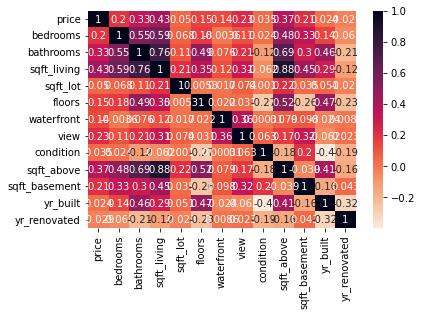

In [583]:
sns.heatmap(cor_Df, xticklabels=cor_Df.columns, yticklabels=cor_Df.columns, 
            annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))
# korelasyon matrisini bir ısı haritası ile grafiğe dönüştürdüm
# burada bir featureın iki boyutta da renk olarak gösterilmesini amaçaldım.
# renklerdeki ton farkı bunların nasıl değiştiğini gösterir

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

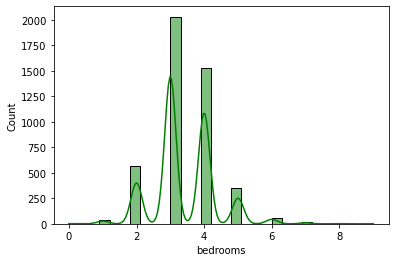

In [584]:
sns.histplot(data=df, x='bedrooms',bins=30, kde=True, color="g") 
# bir histogram grafiği çizdirdim burada evlerdeki bedrooma göre analiz yapabildim. 

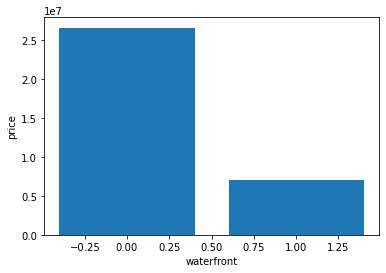

In [585]:
# burda ise waterfronta göre fiyatların bir grafiğini çizdirdim
plt.bar(df.waterfront, df.price, align='center') 
plt.xlabel("waterfront") 
plt.ylabel('price')  

plt.show()

### Step2: Preprocessing & Feature Engineering

##### a) Preprocessing
###### i. Check whether there are any outliers? Remove outliers (if there are any) in your data.

In [586]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.594000e+03,4595.000000,4592.000000,4590.000000,4.593000e+03,4594.000000,4597.000000,4597.000000,4597.000000,4596.000000,4591.000000,4594.000000,4596.000000
mean,5.520972e+05,3.402176,2.160279,2139.356427,1.486399e+04,1.512516,0.007179,0.240809,3.452034,1826.975849,311.813330,1970.794297,809.312010
std,5.641704e+05,0.908143,0.783430,963.922330,3.591013e+04,0.538326,0.084431,0.778634,0.677352,862.306371,464.268346,29.713952,979.549998
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.226250e+05,3.000000,1.750000,1460.000000,5.001000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.550000e+05,4.000000,2.500000,2620.000000,1.100500e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,605.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


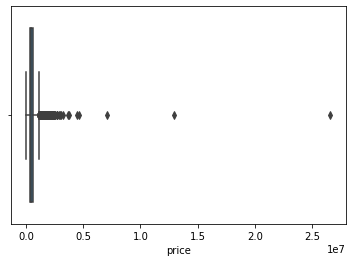

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


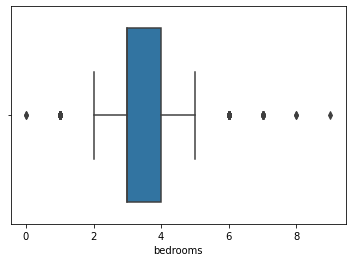

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


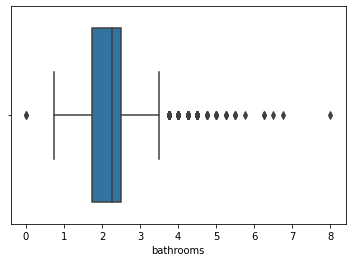

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


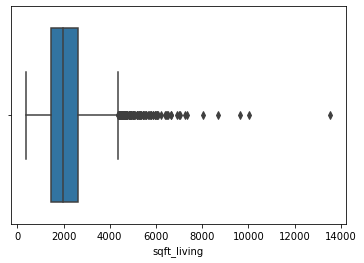

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


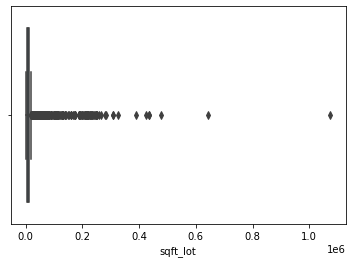

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


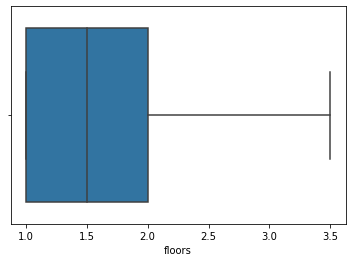

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


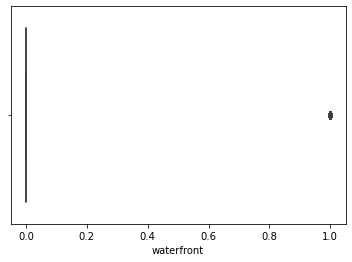

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


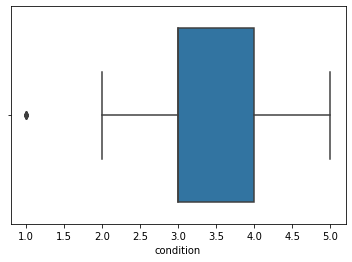

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


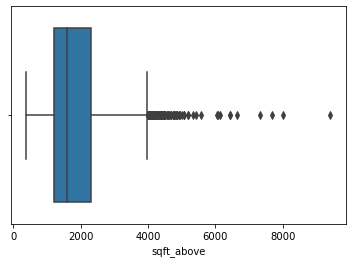

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


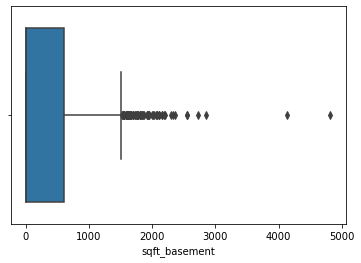

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


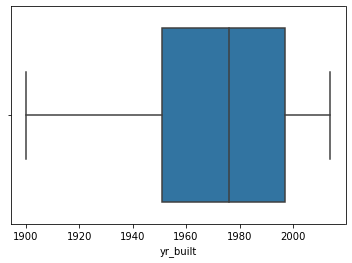

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


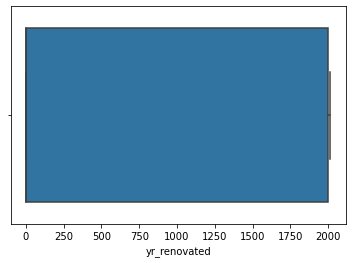

In [587]:
cols = ['price','bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront','condition',
        'sqft_above', 'sqft_basement','yr_built', 'yr_renovated']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

Yukardaki boxplotlara göre hangi kolonlarda outlier değerler var onlara bakıyorum. Daha sonra outlierları düzelteceğim.
price, bedrooms, bathrooms, sqft_living, sqft_lot, waterfront, condition, sqft_above ve sqft_basement

In [588]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

IQR = q3-q1 # IQR değeri
upper_limit = q3 + 1.5*IQR # upper limite göre outlier değer hesaplanacak
lower_limit = q1 - 1.5*IQR # lower limite göre de outlier hesaplanacak.

def outliers(df):
    if df>upper_limit:
        return upper_limit
    if df<lower_limit:
        return lower_limit
    else:
        return df
    
df['price']=df['price'].apply(outliers)

In [589]:
q1 = df['bedrooms'].quantile(0.25)
q3 = df['bedrooms'].quantile(0.75)

IQR = q3-q1 # IQR değeri
upper_limit = q3 + 1.5*IQR # upper limite göre outlier değer hesaplanacak
lower_limit = q1 - 1.5*IQR # lower limite göre de outlier hesaplanacak.

def outliers(df):
    if df>upper_limit:
        return upper_limit
    if df<lower_limit:
        return lower_limit
    else:
        return df
    
df['bedrooms']=df['bedrooms'].apply(outliers)

In [590]:
q1 = df['bathrooms'].quantile(0.25)
q3 = df['bathrooms'].quantile(0.75)

IQR = q3-q1 # IQR değeri
upper_limit = q3 + 1.5*IQR # upper limite göre outlier değer hesaplanacak
lower_limit = q1 - 1.5*IQR # lower limite göre de outlier hesaplanacak.

def outliers(df):
    if df>upper_limit:
        return upper_limit
    if df<lower_limit:
        return lower_limit
    else:
        return df
    
df['bathrooms']=df['bathrooms'].apply(outliers)

In [591]:
q1 = df['sqft_living'].quantile(0.25)
q3 = df['sqft_living'].quantile(0.75)

IQR = q3-q1 # IQR değeri
upper_limit = q3 + 1.5*IQR # upper limite göre outlier değer hesaplanacak
lower_limit = q1 - 1.5*IQR # lower limite göre de outlier hesaplanacak.

def outliers(df):
    if df>upper_limit:
        return upper_limit
    if df<lower_limit:
        return lower_limit
    else:
        return df
    
df['sqft_living']=df['sqft_living'].apply(outliers)

In [592]:
q1 = df['sqft_lot'].quantile(0.25)
q3 = df['sqft_lot'].quantile(0.75)

IQR = q3-q1 # IQR değeri
upper_limit = q3 + 1.5*IQR # upper limite göre outlier değer hesaplanacak
lower_limit = q1 - 1.5*IQR # lower limite göre de outlier hesaplanacak.

def outliers(df):
    if df>upper_limit:
        return upper_limit
    if df<lower_limit:
        return lower_limit
    else:
        return df
    
df['sqft_lot']=df['sqft_lot'].apply(outliers)

In [593]:
q1 = df['waterfront'].quantile(0.25)
q3 = df['waterfront'].quantile(0.75)

IQR = q3-q1 # IQR değeri
upper_limit = q3 + 1.5*IQR # upper limite göre outlier değer hesaplanacak
lower_limit = q1 - 1.5*IQR # lower limite göre de outlier hesaplanacak.

def outliers(df):
    if df>upper_limit:
        return upper_limit
    if df<lower_limit:
        return lower_limit
    else:
        return df
    
df['waterfront']=df['waterfront'].apply(outliers)

In [594]:
q1 = df['condition'].quantile(0.25)
q3 = df['condition'].quantile(0.75)

IQR = q3-q1 # IQR değeri
upper_limit = q3 + 1.5*IQR # upper limite göre outlier değer hesaplanacak
lower_limit = q1 - 1.5*IQR # lower limite göre de outlier hesaplanacak.

def outliers(df):
    if df>upper_limit:
        return upper_limit
    if df<lower_limit:
        return lower_limit
    else:
        return df
    
df['condition']=df['condition'].apply(outliers)

In [595]:
q1 = df['sqft_above'].quantile(0.25)
q3 = df['sqft_above'].quantile(0.75)

IQR = q3-q1 # IQR değeri
upper_limit = q3 + 1.5*IQR # upper limite göre outlier değer hesaplanacak
lower_limit = q1 - 1.5*IQR # lower limite göre de outlier hesaplanacak.

def outliers(df):
    if df>upper_limit:
        return upper_limit
    if df<lower_limit:
        return lower_limit
    else:
        return df
    
df['sqft_above']=df['sqft_above'].apply(outliers)

In [596]:
q1 = df['sqft_basement'].quantile(0.25)
q3 = df['sqft_basement'].quantile(0.75)

IQR = q3-q1 # IQR değeri
upper_limit = q3 + 1.5*IQR # upper limite göre outlier değer hesaplanacak
lower_limit = q1 - 1.5*IQR # lower limite göre de outlier hesaplanacak.

def outliers(df):
    if df>upper_limit:
        return upper_limit
    if df<lower_limit:
        return lower_limit
    else:
        return df
    
df['sqft_basement']=df['sqft_basement'].apply(outliers)

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


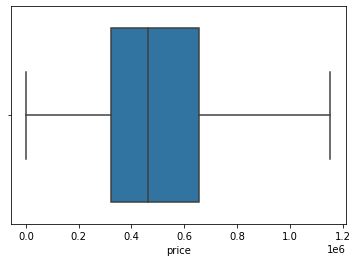

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


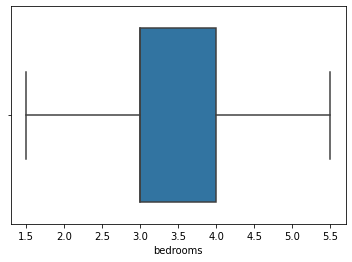

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


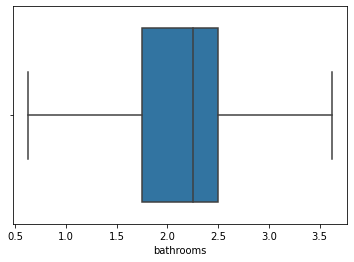

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


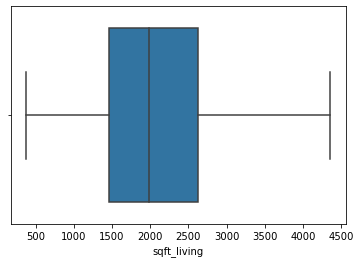

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


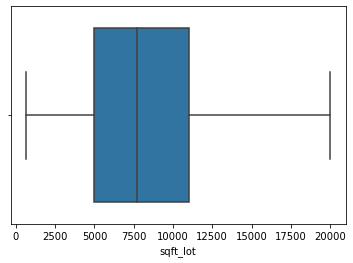

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


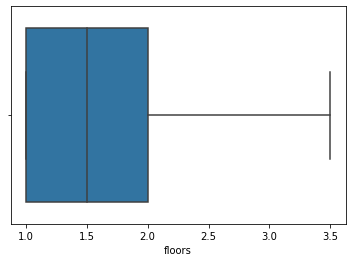

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


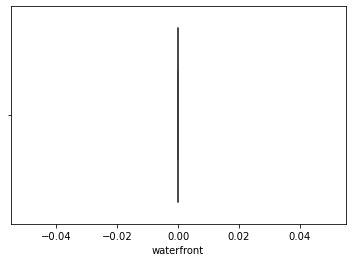

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


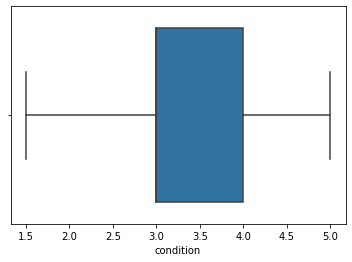

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


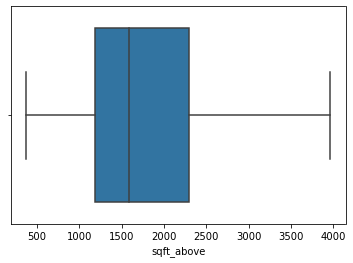

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


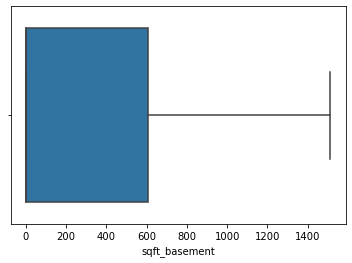

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


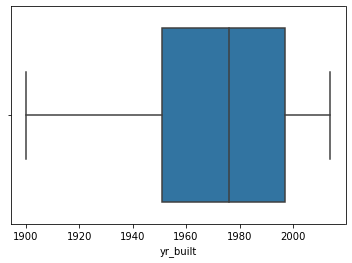

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


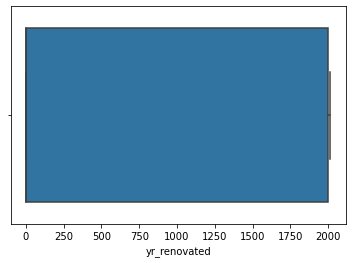

In [597]:
cols = ['price','bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront','condition',
        'sqft_above', 'sqft_basement','yr_built', 'yr_renovated']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

###### ii. How many columns include missing values?

In [598]:
df.isna() # null değer var mı ona bakıyorum varsa true, yoksa false gösterir

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [599]:
df.isna().sum() # null değer varsa bunların kolonlara göre toplamı
# buna göre veri setim içinde null değerler vardır, olmadığı kolonlarda vardır.

date              0
price             6
bedrooms          5
bathrooms         8
sqft_living      10
sqft_lot          7
floors            6
waterfront        3
view              3
condition         3
sqft_above        4
sqft_basement     9
yr_built          6
yr_renovated      4
street            1
city              0
statezip          0
country          13
dtype: int64

In [600]:
df.isna().sum().sort_values(ascending=False) # sütunları null değer sayılarına göre büyükten küçüğe doğru sıralıyorum

country          13
sqft_living      10
sqft_basement     9
bathrooms         8
sqft_lot          7
floors            6
yr_built          6
price             6
bedrooms          5
yr_renovated      4
sqft_above        4
condition         3
view              3
waterfront        3
street            1
city              0
statezip          0
date              0
dtype: int64

In [601]:
# her bir sütundaki null değerlerin o sütuna göre yüzdeliğini hesaplıyorum
missingPercenteges = df.isna().sum().sort_values(ascending = False) / len(df)*100
missingPercenteges  

country          0.282609
sqft_living      0.217391
sqft_basement    0.195652
bathrooms        0.173913
sqft_lot         0.152174
floors           0.130435
yr_built         0.130435
price            0.130435
bedrooms         0.108696
yr_renovated     0.086957
sqft_above       0.086957
condition        0.065217
view             0.065217
waterfront       0.065217
street           0.021739
city             0.000000
statezip         0.000000
date             0.000000
dtype: float64

<AxesSubplot:>

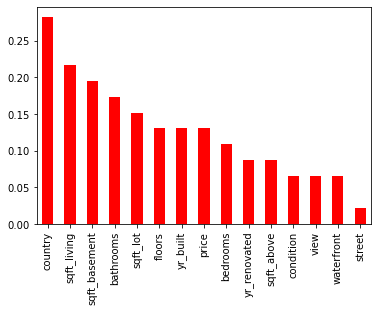

In [602]:
missingPercenteges[missingPercenteges != 0].plot(kind='bar', color='red')

In [603]:
def eksik_deger_tablosu(df): 
    eksik_deger = df.isnull().sum()
    eksik_deger_yuzde = 100 * df.isnull().sum()/len(df)
    eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
    eksik_deger_tablo_son = eksik_deger_tablo.rename(
    columns = {0 : 'Eksik Değerler', 1 : '% Değeri'})
    return eksik_deger_tablo_son
  
eksik_deger_tablosu(df)

,Eksik Değerler,% Değeri
date,0,0.000000
price,6,0.130435
bedrooms,5,0.108696
bathrooms,8,0.173913
sqft_living,10,0.217391
sqft_lot,7,0.152174
floors,6,0.130435
waterfront,3,0.065217
view,3,0.065217
condition,3,0.065217


###### iii. Explain your method to handle each of those missing values.

### Null değerlerin doldurulması için bir çok yöntem vardır.
    a) null değerleri ignore edebiliriz.
    b) bu null değerleri elle doldurabiliriz.
    c) null değerleri global olan bir sabitle doldurmak.
    d) null değerleri mean, median veya mod ile doldurmak.
    e) null değerleri olabilecek uygunlukta veri ile doldurmak.

##### a) null değerleri ignore etmek

In [604]:
df.dropna(axis=0) # null değerler içeren satırın silinmesi için dropna 0 kullanılır

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,1955.0,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963.0,0.0,857 170th Pl NE,Bellevue,WA 98008,USA
5,2014-05-02 00:00:00,4.900000e+05,2.0,1.00,880.0,6380.0,1.0,0.0,0.0,3.0,880.0,0.0,1938.0,1994.0,522 NE 88th St,Seattle,WA 98115,USA
8,2014-05-02 00:00:00,4.525000e+05,3.0,2.50,2430.0,20011.0,1.0,0.0,0.0,4.0,1570.0,860.0,1985.0,0.0,46611-46625 SE 129th St,North Bend,WA 98045,USA
11,2014-05-02 00:00:00,1.153562e+06,4.0,2.50,2920.0,4000.0,1.5,0.0,0.0,5.0,1910.0,1010.0,1909.0,1988.0,3838-4098 44th Ave NE,Seattle,WA 98105,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,2014-07-08 00:00:00,2.893733e+05,3.0,2.50,2538.0,4600.0,2.0,0.0,0.0,3.0,2538.0,0.0,2013.0,1923.0,5703 Charlotte Ave SE,Auburn,WA 98092,USA
4594,2014-07-09 00:00:00,2.106143e+05,3.0,2.50,1610.0,7223.0,2.0,0.0,0.0,3.0,1610.0,0.0,1994.0,0.0,26306 127th Ave SE,Kent,WA 98030,USA
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510.0,6360.0,1.0,0.0,0.0,4.0,1510.0,0.0,1954.0,1979.0,501 N 143rd St,Seattle,WA 98133,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010.0,7014.0,2.0,0.0,0.0,3.0,3010.0,0.0,2009.0,0.0,759 Ilwaco Pl NE,Renton,WA 98059,USA


In [605]:
df.dropna(axis=1) # null değerler içeren sütunun silinmesi için dropna 1 kullanılır

,date,city,statezip
0,2014-05-02 00:00:00,Shoreline,WA 98133
1,2014-05-02 00:00:00,Seattle,WA 98119
2,2014-05-02 00:00:00,Kent,WA 98042
3,2014-05-02 00:00:00,Bellevue,WA 98008
4,2014-05-02 00:00:00,Redmond,WA 98052
...,...,...,...
4595,2014-07-09 00:00:00,Seattle,WA 98133
4596,2014-07-09 00:00:00,Bellevue,WA 98007
4597,2014-07-09 00:00:00,Renton,WA 98059
4598,2014-07-10 00:00:00,Seattle,WA 98178


Bu gibi yöntemler önerilmez. Çünkü neredeyese tüm dataseti boşalttığını görüyoruz.Bu da bizim istediğimizbir şey değildir.

In [606]:
data = df.dropna(subset=['price'],axis=0) 
data
# burada ise price kolonundaki null değer içeren verilerin satırlarını yok ediyor.
# normalde 4600 satırdan oluşan datasetim bu işlem sonucunda 4594 satıra indi.
# bunu her satır için for döngüsünde yapabilriz.

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,1955.0,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,1.153562e+06,5.0,2.50,3650.0,9050.0,2.0,0.0,4.0,5.0,3370.0,280.0,NaN,0.0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,NaN,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,1966.0,0.0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963.0,0.0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,NaN,10500.0,1.0,0.0,0.0,4.0,1140.0,NaN,1976.0,1992.0,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510.0,6360.0,1.0,0.0,0.0,4.0,1510.0,0.0,1954.0,1979.0,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460.0,7573.0,NaN,0.0,0.0,3.0,1460.0,0.0,1983.0,2009.0,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010.0,7014.0,2.0,0.0,0.0,3.0,3010.0,0.0,2009.0,0.0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090.0,6630.0,1.0,0.0,0.0,3.0,1070.0,1020.0,1974.0,0.0,5148 S Creston St,Seattle,WA 98178,USA


##### b) bu null değerleri elle doldurabiliriz.

In [607]:
df.isnull().sum()
# burada 1 tane null değer içeren street kolonundaki satır var bunu ele doldurabilirim

date              0
price             6
bedrooms          5
bathrooms         8
sqft_living      10
sqft_lot          7
floors            6
waterfront        3
view              3
condition         3
sqft_above        4
sqft_basement     9
yr_built          6
yr_renovated      4
street            1
city              0
statezip          0
country          13
dtype: int64

In [608]:
df['street'] = df['street'].fillna('18810 Densmore Ave N')

In [609]:
df.isnull().sum()

date              0
price             6
bedrooms          5
bathrooms         8
sqft_living      10
sqft_lot          7
floors            6
waterfront        3
view              3
condition         3
sqft_above        4
sqft_basement     9
yr_built          6
yr_renovated      4
street            0
city              0
statezip          0
country          13
dtype: int64

##### c) null değerleri global olan bir sabitle doldurmak.

In [610]:
df.tail(5) # 4599.satırdaki country null şimdi işlemi yapıyorum sonra bakacağım

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510.0,6360.0,1.0,0.0,0.0,4.0,1510.0,0.0,1954.0,1979.0,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460.0,7573.0,NaN,0.0,0.0,3.0,1460.0,0.0,1983.0,2009.0,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010.0,7014.0,2.0,0.0,0.0,3.0,3010.0,0.0,2009.0,0.0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090.0,6630.0,1.0,0.0,0.0,3.0,1070.0,1020.0,1974.0,0.0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490.0,8102.0,2.0,0.0,0.0,4.0,1490.0,0.0,1990.0,0.0,18717 SE 258th St,Covington,WA 98042,NaN


In [611]:
# mesela country sütununda 13 değer null ama veri setindeki tüm verilerin country değeri USA 
# buna göre null olan satırları USA ile doldurabilirm.
cntry='USA'
df['country'] = df['country'].fillna(cntry)

In [612]:
print(df.isnull().sum()) # null olan değerlerin dolduğunu görüyorum

date              0
price             6
bedrooms          5
bathrooms         8
sqft_living      10
sqft_lot          7
floors            6
waterfront        3
view              3
condition         3
sqft_above        4
sqft_basement     9
yr_built          6
yr_renovated      4
street            0
city              0
statezip          0
country           0
dtype: int64


In [613]:
df.tail(2) # null değerin usa ile dolduğunu görüyorum.

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4598,2014-07-10 00:00:00,203400.0,4.0,2.0,2090.0,6630.0,1.0,0.0,0.0,3.0,1070.0,1020.0,1974.0,0.0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.0,3.0,2.5,1490.0,8102.0,2.0,0.0,0.0,4.0,1490.0,0.0,1990.0,0.0,18717 SE 258th St,Covington,WA 98042,USA


##### d) null değerleri mean, median veya mod ile doldurmak.

In [614]:
# öncelikle veri setine bakıyorum hangi kolonda işlem yapabilirim. çünkü numeric olması gerekir.
df.isna().sum()
# price, bedrooms, bathrooms, sqft_living, sqft_lot, floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,

date              0
price             6
bedrooms          5
bathrooms         8
sqft_living      10
sqft_lot          7
floors            6
waterfront        3
view              3
condition         3
sqft_above        4
sqft_basement     9
yr_built          6
yr_renovated      4
street            0
city              0
statezip          0
country           0
dtype: int64

In [615]:
median_bed = df['bedrooms'].median()
median_bed 

3.0

In [616]:
df['bedrooms'].fillna(median_bed,inplace=True)

In [617]:
# bathroom içinde mod değerini alacağım.
mod_bath = df['bathrooms'].mode()
mod_bath 
# iki tane mod değeri varmış ben 2.5 değeri ile dolduracağım

0    2.5
dtype: float64

In [618]:
df['bathrooms'].fillna(2.5,inplace=True)

In [619]:
df.isna().sum()

date              0
price             6
bedrooms          0
bathrooms         0
sqft_living      10
sqft_lot          7
floors            6
waterfront        3
view              3
condition         3
sqft_above        4
sqft_basement     9
yr_built          6
yr_renovated      4
street            0
city              0
statezip          0
country           0
dtype: int64

In [620]:
# sırada sqft living ve sqft lot değeri var bunları mean ile yapabilirim.
mean_liv = df['sqft_living'].mean()
mean_liv 

2114.5823529411764

In [621]:
mean_lot = df['sqft_lot'].mean()
mean_lot 

8938.303505334205

In [622]:
df['sqft_living'].fillna(mean_liv,inplace=True)
df['sqft_lot'].fillna(mean_lot,inplace=True)

In [623]:
df.isnull().sum()

date             0
price            6
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           6
waterfront       3
view             3
condition        3
sqft_above       4
sqft_basement    9
yr_built         6
yr_renovated     4
street           0
city             0
statezip         0
country          0
dtype: int64

In [624]:
# floorsu da medyan ile yapacağım
median_floors = df['floors'].median()
median_floors

1.5

In [625]:
# waterfront 1-0 değerlerine sahip o yüzden ortalama olmaz mod veya median olabilir.
median_wf = df['waterfront'].median()
median_wf

0.0

In [626]:
# viiew içinde medya kulandım.
mean_view = df['view'].median()
mean_view

0.0

In [627]:
df['floors'].fillna(median_floors,inplace=True)
df['waterfront'].fillna(median_wf,inplace=True)
df['view'].fillna(mean_view,inplace=True)

In [628]:
df.isnull().sum()

date             0
price            6
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        3
sqft_above       4
sqft_basement    9
yr_built         6
yr_renovated     4
street           0
city             0
statezip         0
country          0
dtype: int64

In [629]:
mean_above = df['sqft_above'].mean()
mean_base = df['sqft_basement'].mean()
mean_built = df['yr_built'].mean()
mean_renov = df['yr_renovated'].mean()

In [630]:
df['sqft_above'].fillna(mean_above,inplace=True)
df['sqft_basement'].fillna(mean_base,inplace=True)
df['yr_built'].fillna(mean_built,inplace=True)
df['yr_renovated'].fillna(mean_renov,inplace=True)

In [631]:
df.isnull().sum()

date             0
price            6
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        3
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Son olarak condition ve price sütunu kaldı. Bu kısımda condition sütununu direkt ignore edeceğim. Çünkü verisetim içerisinde anlamlı bir sütun değil. Diğer featureları etkilemiyor. 

In [632]:
df.drop('condition', axis=1, inplace=True)

In [633]:
df.isnull().sum()

date             0
price            6
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Bu şekilde veri setim içerisindeki null değerleri temizlemiş oldum.

##### e) null değerleri olabilecek uygunlukta veri ile doldurmak.

In [634]:
# aslında burada yine aynı sınıfta olanlar için mean ve medyana göre doldurma yapılabilir.
df.price.isna().sum() # price kolonunda 6 null değer var

6

In [635]:
# mesela 32. satır için özelliklere bakalım. 
df.loc[32]

date               2014-05-02 00:00:00
price                              NaN
bedrooms                           4.0
bathrooms                          2.0
sqft_living                     1820.0
sqft_lot                        5000.0
floors                             1.5
waterfront                         0.0
view                               1.0
sqft_above                      1640.0
sqft_basement                    180.0
yr_built                        1945.0
yr_renovated                    2010.0
street           7201-7399 55th Ave NE
city                           Seattle
statezip                      WA 98115
country                            USA
Name: 32, dtype: object

In [636]:
# burada mevcut verileri belirli bir özelliğe göre gruplandırıp doldumam gerek. o yüzden floorsa göre gruplandırız.
df.groupby(['floors']).mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated
floors,,,,,,,,,,,
1.0,430218.503125,3.192485,1.778988,1763.515597,9610.936656,0.0,0.213923,1334.181808,424.547384,1960.303732,1018.916234
1.5,559968.025757,3.480000,1.875000,1982.505739,7904.768690,0.0,0.302222,1658.440000,323.177115,1936.439543,1024.026667
2.0,602314.255744,3.620718,2.596754,2570.231121,8911.779341,0.0,0.247514,2404.218847,170.951023,1989.927170,540.319682
2.5,845867.787500,4.158537,2.838415,3143.282496,6819.658537,0.0,0.390244,2773.048780,419.085366,1956.439024,793.568586
3.0,526560.768663,3.050781,2.494141,1753.351562,2319.734375,0.0,0.320312,1692.101562,76.406250,2002.953125,308.359375
3.5,829250.000000,2.250000,1.562500,2232.000000,3038.000000,0.0,1.000000,2232.000000,0.000000,1998.500000,1004.500000


In [637]:
# veriseti üzeride direkt işlem yapmak istemediğim için dataframe oluşturdum.
temp = pd.DataFrame()

In [638]:
temp['floors'] = df['floors'].copy()
temp['price'] = df['price'].copy()

temp['price'] = temp.groupby("floors").transform(lambda x: x.fillna(x.mean()))

df['price'] = temp['price'].copy()

In [639]:
sart = df['floors'] == df.loc[32, 'floors']
ort = df[sart]['price'].mean()
# 32. satır ile aynı sınıfta olan yani floors aynı olan sınıfların ortalaması
# 32.satırdaki floor değeri 1.5 o kolonun price ortlaması ile doldrudum

print("32. satırın alması gereken price:", ort)
print('32. satır doldurulduktan sonra price:', df.loc[32]['price'])

32. satırın alması gereken price: 559968.025756599
32. satır doldurulduktan sonra price: 559968.025756599


In [640]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [641]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340.000000,7912.0,1.5,0.0,0.0,1340.0,0.000000,1955.000000,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,1.153562e+06,5.0,2.50,3650.000000,9050.0,2.0,0.0,4.0,3370.0,280.000000,1970.794297,0.0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.50,1930.000000,11947.0,1.0,0.0,0.0,1930.0,0.000000,1966.000000,0.0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000.000000,8030.0,1.0,0.0,0.0,1000.0,1000.000000,1963.000000,0.0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,2114.582353,10500.0,1.0,0.0,0.0,1140.0,304.925398,1976.000000,1992.0,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510.000000,6360.0,1.0,0.0,0.0,1510.0,0.000000,1954.000000,1979.0,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460.000000,7573.0,1.5,0.0,0.0,1460.0,0.000000,1983.000000,2009.0,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010.000000,7014.0,2.0,0.0,0.0,3010.0,0.000000,2009.000000,0.0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090.000000,6630.0,1.0,0.0,0.0,1070.0,1020.000000,1974.000000,0.0,5148 S Creston St,Seattle,WA 98178,USA


###### iv. Explain if you need to apply any kind of transformations and/or encoding.

In [642]:
df.head(2)
# waterfront burada 0-1 değerlerine sahip bunu yes-no ile değiştireceğim

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340.0,7912.0,1.5,0.0,0.0,1340.0,0.0,1955.000000,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,1153562.5,5.0,2.5,3650.0,9050.0,2.0,0.0,4.0,3370.0,280.0,1970.794297,0.0,709 W Blaine St,Seattle,WA 98119,USA


In [643]:
df['waterfront'] = np.where(df['waterfront'] == 1, 'Yes', 'No') # waterfront kolonu 1 ise yes 0 ise no olur.
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340.0,7912.0,1.5,No,0.0,1340.0,0.0,1955.000000,2005.0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,1153562.5,5.0,2.5,3650.0,9050.0,2.0,No,4.0,3370.0,280.0,1970.794297,0.0,709 W Blaine St,Seattle,WA 98119,USA


In [644]:
df[['floors', 'bathrooms', 'bedrooms']] = \
    df[['floors', 'bathrooms', 'bedrooms']].astype('int')
df.dtypes

date              object
price            float64
bedrooms           int32
bathrooms          int32
sqft_living      float64
sqft_lot         float64
floors             int32
waterfront        object
view             float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
street            object
city              object
statezip          object
country           object
dtype: object

In [645]:
df[['view', 'yr_built', 'yr_renovated']] = \
    df[['view', 'yr_built', 'yr_renovated']].astype('int')
df.dtypes

date              object
price            float64
bedrooms           int32
bathrooms          int32
sqft_living      float64
sqft_lot         float64
floors             int32
waterfront        object
view               int32
sqft_above       float64
sqft_basement    float64
yr_built           int32
yr_renovated       int32
street            object
city              object
statezip          object
country           object
dtype: object

##### b) Feature Engineering
###### i. Determine which features are the most valuable and whether you need to create a new feature? 

In [646]:
copy_Df= df.copy() # bu metot ile veri seti üzerinde direkt işlem yapmadan kopyalanmış datada işlem yapmamızı sağlar.
copy_Df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3,1,1340.000000,7912.0,1,No,0,1340.0,0.000000,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,1.153562e+06,5,2,3650.000000,9050.0,2,No,4,3370.0,280.000000,1970,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3,2,1930.000000,11947.0,1,No,0,1930.0,0.000000,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3,2,2000.000000,8030.0,1,No,0,1000.0,1000.000000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4,2,2114.582353,10500.0,1,No,0,1140.0,304.925398,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3,1,1510.000000,6360.0,1,No,0,1510.0,0.000000,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3,2,1460.000000,7573.0,1,No,0,1460.0,0.000000,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3,2,3010.000000,7014.0,2,No,0,3010.0,0.000000,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4,2,2090.000000,6630.0,1,No,0,1070.0,1020.000000,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [647]:
cor_Df = copy_Df.corr()
cor_Df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.336035,0.461839,0.662777,0.155496,0.257779,0.315622,0.572153,0.277460,0.044846,-0.060070
bedrooms,0.336035,1.000000,0.488631,0.618525,0.211156,0.163166,0.098677,0.502803,0.317270,0.163230,-0.069496
bathrooms,0.461839,0.488631,1.000000,0.677822,0.107906,0.481699,0.173887,0.615501,0.228575,0.420030,-0.202352
sqft_living,0.662777,0.618525,0.677822,1.000000,0.368570,0.352058,0.289634,0.867955,0.400216,0.304944,-0.130756
sqft_lot,0.155496,0.211156,0.107906,0.368570,1.000000,-0.135441,0.130932,0.350655,0.087742,0.067120,0.018255
floors,0.257779,0.163166,0.481699,0.352058,-0.135441,1.000000,0.021239,0.534445,-0.267763,0.562066,-0.247335
view,0.315622,0.098677,0.173887,0.289634,0.130932,0.021239,1.000000,0.166498,0.300325,-0.061458,0.022752
sqft_above,0.572153,0.502803,0.615501,0.867955,0.350655,0.534445,0.166498,1.000000,-0.090543,0.426192,-0.166657
sqft_basement,0.277460,0.317270,0.228575,0.400216,0.087742,-0.267763,0.300325,-0.090543,1.000000,-0.175779,0.044818
yr_built,0.044846,0.163230,0.420030,0.304944,0.067120,0.562066,-0.061458,0.426192,-0.175779,1.000000,-0.320435


<AxesSubplot:>

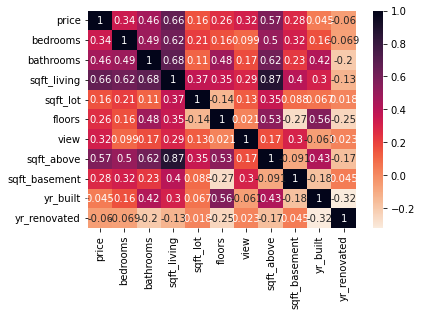

In [648]:
sns.heatmap(cor_Df, xticklabels=cor_Df.columns, yticklabels=cor_Df.columns,  #corr matrix çizilir
            annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))

bu heatmape göre koyu renkli alanlar max korelasyona sahiptir. renk açıldıkça korelasyon azalır. Buna göre 0,87 oranı ile birbirine en yakın korelasyon sqrt_living ve sqrt_above arasındadır. ev içi m2 ve çatı kayı m2 bu yüzden de birbirine yüksek corr olan sütunları ignore edebiliriz. 

In [649]:
df.corr().abs()["price"].nlargest(13)

price            1.000000
sqft_living      0.662777
sqft_above       0.572153
bathrooms        0.461839
bedrooms         0.336035
view             0.315622
sqft_basement    0.277460
floors           0.257779
sqft_lot         0.155496
yr_renovated     0.060070
yr_built         0.044846
Name: price, dtype: float64

###### ii. Select (i.e., filter) or create features that make data mining algorithms work.

In [650]:
df.filter(['floors'])

,floors
0,1
1,2
2,1
3,1
4,1
...,...
4595,1
4596,1
4597,2
4598,1


In [651]:
df.floors.unique()

array([1, 2, 3])

In [652]:
df['bedrooms'] = df['bedrooms'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
df['view'] = df['view'].astype(int)
df['yr_built'] = df['yr_built'].astype(int)

display(df.dtypes)

date              object
price            float64
bedrooms           int32
bathrooms          int32
sqft_living      float64
sqft_lot         float64
floors             int32
waterfront        object
view               int32
sqft_above       float64
sqft_basement    float64
yr_built           int32
yr_renovated       int32
street            object
city              object
statezip          object
country           object
dtype: object

In [653]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3,1,1340.000000,7912.0,1,No,0,1340.0,0.000000,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,1.153562e+06,5,2,3650.000000,9050.0,2,No,4,3370.0,280.000000,1970,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3,2,1930.000000,11947.0,1,No,0,1930.0,0.000000,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3,2,2000.000000,8030.0,1,No,0,1000.0,1000.000000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4,2,2114.582353,10500.0,1,No,0,1140.0,304.925398,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3,1,1510.000000,6360.0,1,No,0,1510.0,0.000000,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3,2,1460.000000,7573.0,1,No,0,1460.0,0.000000,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3,2,3010.000000,7014.0,2,No,0,3010.0,0.000000,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4,2,2090.000000,6630.0,1,No,0,1070.0,1020.000000,1974,0,5148 S Creston St,Seattle,WA 98178,USA


###### iii. Apply dimensionality reduction i.e. PCA to your data. 

In [654]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,1,1340.0,7912.0,1,No,0,1340.0,0.0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,1153562.5,5,2,3650.0,9050.0,2,No,4,3370.0,280.0,1970,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3,2,1930.0,11947.0,1,No,0,1930.0,0.0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [655]:
df.waterfront.unique()
# 17 özellik ve 2 sınıf vardır diyebilirim
# sınıf olarak ise sahil kenarı mı değil mi waterfront kullanacağım
# bu özellikleri kullanarak hangi sınıfa ait mi onu belirlyeceğim.

array(['No'], dtype=object)

In [656]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country'],
      dtype='object')

In [657]:
tempdf=df.drop(['date'], axis=1, inplace=True)
tempdf=df.drop(['street'], axis=1, inplace=True)
tempdf=df.drop(['city'], axis=1, inplace=True)
tempdf=df.drop(['statezip'], axis=1, inplace=True)
tempdf=df.drop(['country'], axis=1, inplace=True)

In [658]:
df.drop(['waterfront'], axis=1, inplace=True)

In [659]:
df.columns # string kolonları sildim.

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

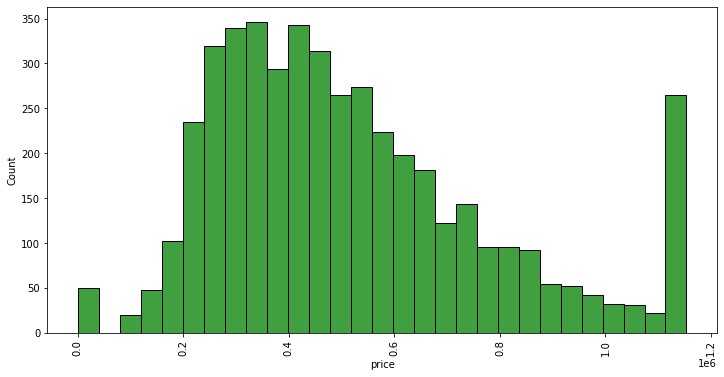

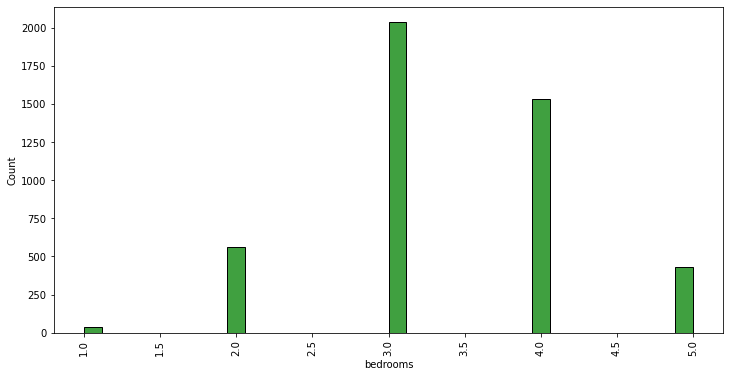

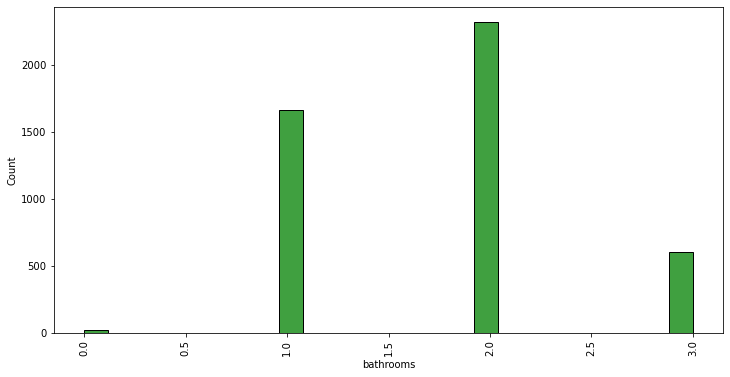

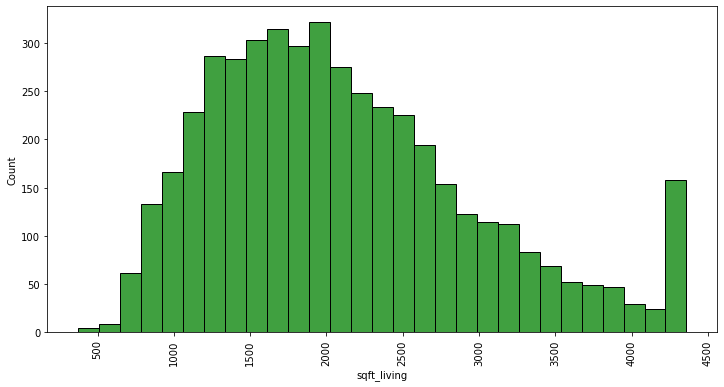

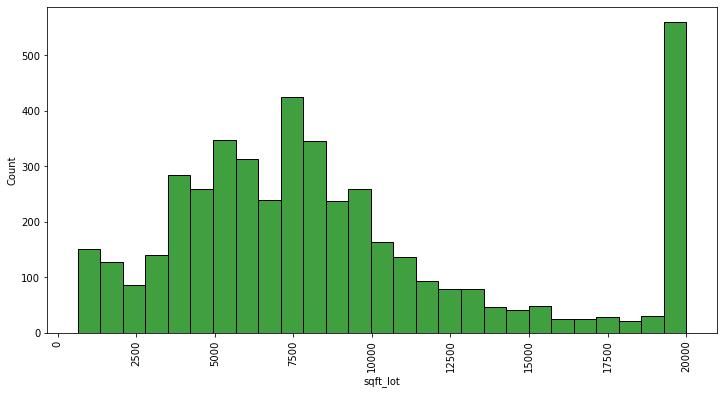

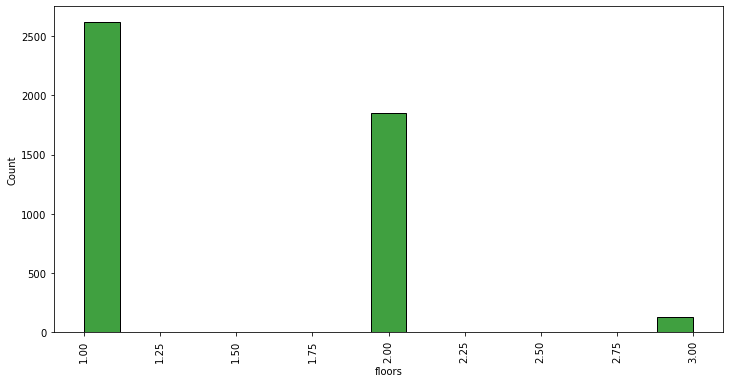

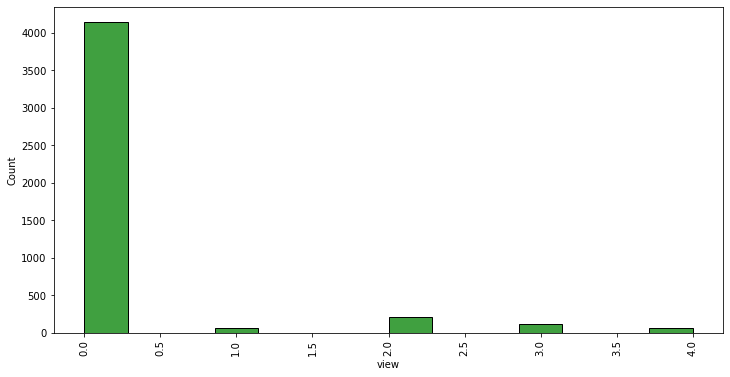

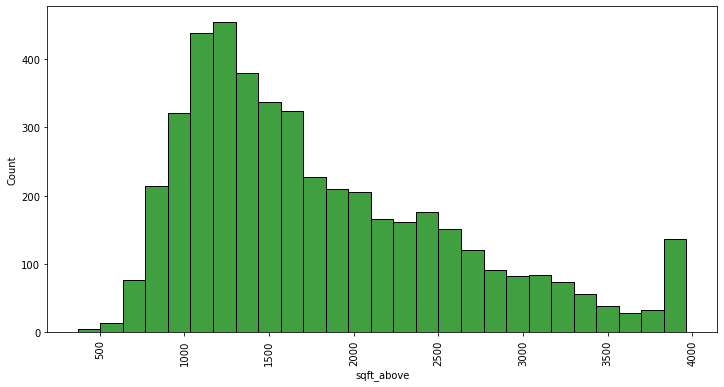

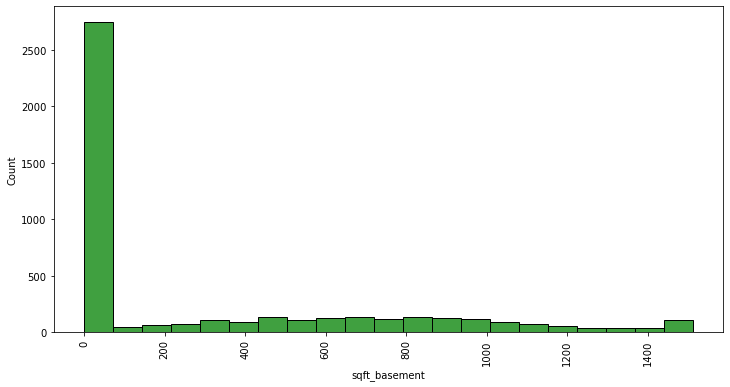

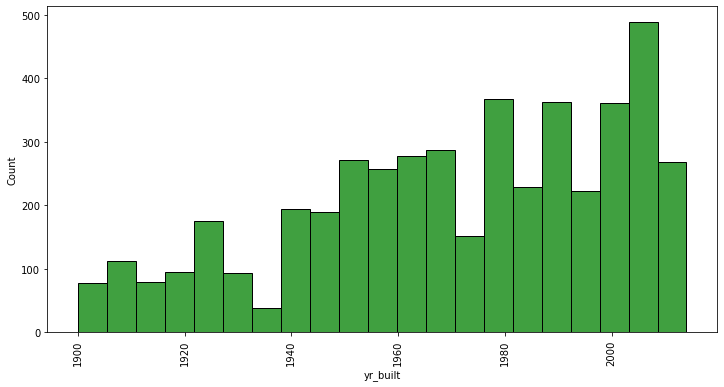

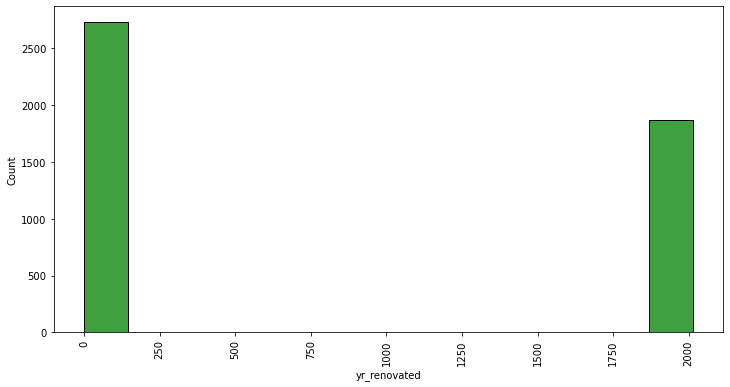

In [660]:
for col in df.columns:
    plt.figure(figsize=(12,6))
    sns.histplot(df[col], color="g")
    plt.xticks(rotation=90)
    plt.show
# kolonların histpgram grafiğini incelyiyorum

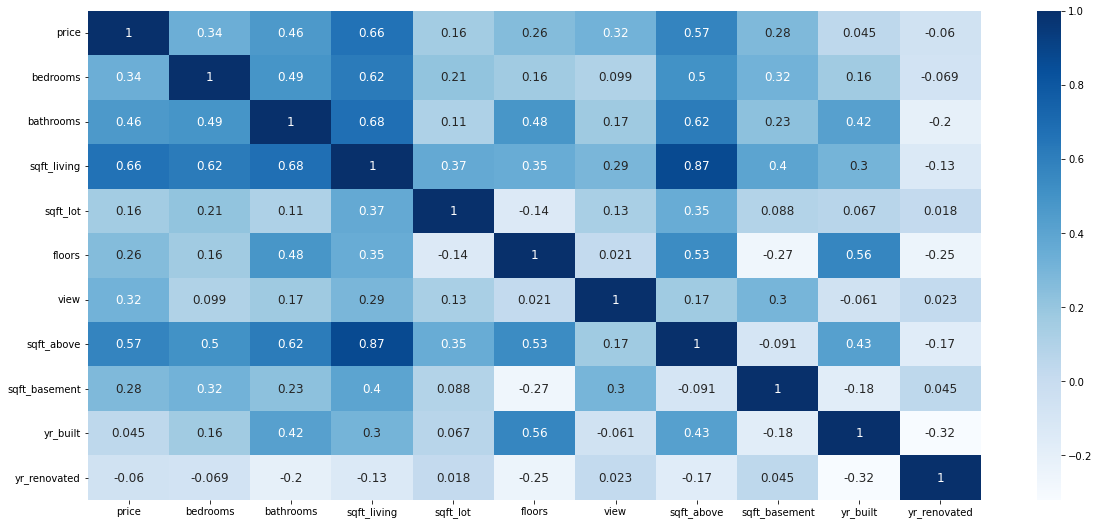

In [661]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(), annot=True, cmap="Blues", annot_kws={"fontsize":12})
plt.show()
# corr matrisini heatmap ile daha düzgün görüntüleyebilmek için farklı bir yöntemle yazdırıyrum.

In [662]:
from sklearn.preprocessing import StandardScaler  
# veri setimi standart hale getirmek için bir scaler işlemi yapmam gerek
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df))
scaled_data

,0,1,2,3,4,5,6,7,8,9,10
0,-0.780811,-0.448842,-1.132257,-0.893774,-0.190537,-0.831187,-0.309194,-0.587422,-0.696944,-0.531915,1.221315
1,2.433509,1.909435,0.355427,1.771686,0.020737,0.980022,4.830079,1.949129,-0.056970,-0.026717,-0.826657
2,-0.669914,-0.448842,0.355427,-0.212986,0.558574,-0.831187,-0.309194,0.149802,-0.696944,-0.161436,-0.826657
3,-0.371642,-0.448842,0.355427,-0.132214,-0.168630,-0.831187,-0.309194,-1.012264,1.588677,-0.262476,-0.826657
4,0.125480,0.730297,0.355427,0.000000,0.289934,-0.831187,-0.309194,-0.837329,0.000000,0.175362,1.208036
...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.799294,-0.448842,-1.132257,-0.697615,-0.478671,-0.831187,-0.309194,-0.375002,-0.696944,-0.565594,1.194757
4596,0.065570,-0.448842,0.355427,-0.755309,-0.253473,-0.831187,-0.309194,-0.437478,-0.696944,0.411121,1.225400
4597,-0.383480,-0.448842,0.355427,1.033203,-0.357253,0.980022,-0.309194,1.499298,-0.696944,1.286797,-0.826657
4598,-1.199922,0.730297,0.355427,-0.028365,-0.428544,-0.831187,-0.309194,-0.924796,1.634390,0.108002,-0.826657


PCA, boyutsallığı azaltmanın en temsili yöntemidir. Bu, çok boyutlu verilerin büyük varyans yönünde yeniden eksenlenmesi yöntemidir. Değişkenler arasındaki bağımlılık ne kadar büyükse, ana bileşen orijinal verileri o kadar küçük gösterebilir. 

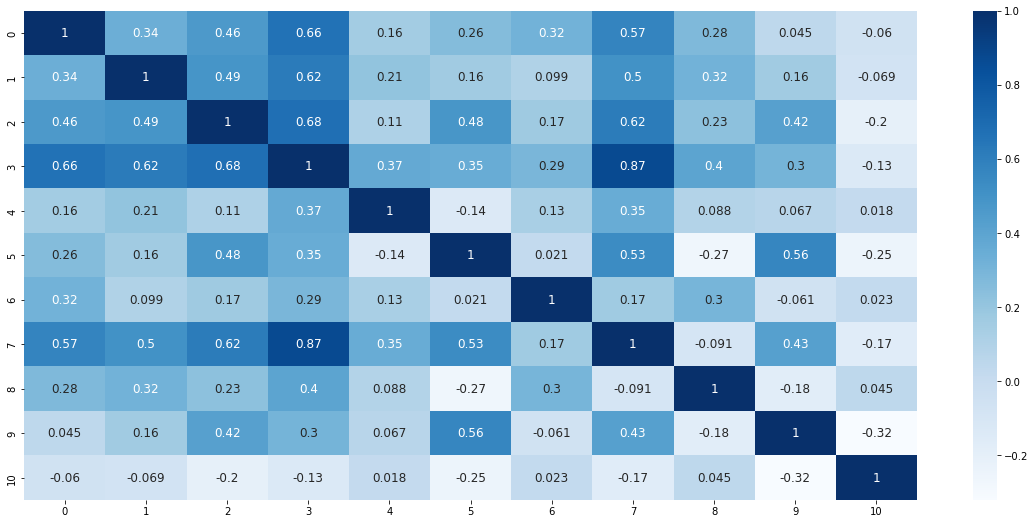

In [663]:
plt.figure(figsize=(20,9))
sns.heatmap(scaled_data.corr(), annot=True, cmap="Blues", annot_kws={"fontsize":12})
plt.show()
# heatmap ile corr bakıyorum

Koyu renk yüksek corr temsil ediyor. Buna göre sqft above ve sqft living yüksek korelasyona sahip. Bu nedenle boyut azaltma yapmamız gerekir.

In [664]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca.head()

,PC1,PC2
0,-2.208853,0.221500
1,4.353556,1.692279
2,-0.467411,-0.405239
3,-0.703387,0.856792
4,-0.285505,0.818401


In [665]:
pca.n_components_

2

<AxesSubplot:>

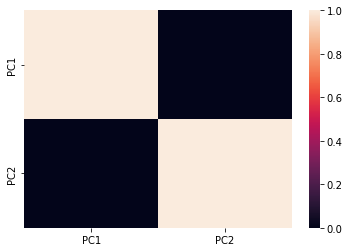

In [666]:
sns.heatmap(data_pca.corr())

Elde edilen heatmape göre, Componentler arasında bir ilişki olmadığını gösterir. Bu sayede de daha yüksek boyutlu datasetten daha düşük boyutlu bir datasete geçiş yapmış olduk. 

In [667]:
data_pca

,PC1,PC2
0,-2.208853,0.221500
1,4.353556,1.692279
2,-0.467411,-0.405239
3,-0.703387,0.856792
4,-0.285505,0.818401
...,...,...
4595,-2.082708,0.172071
4596,-0.978868,-0.118754
4597,1.497155,-1.953720
4598,-0.463857,0.691695


### Step3: Choose Data Mining Algorithms & Explain

##### a) Select the data mining approaches (Regression, Classification or Clustering) that is appropriate for your dataset. Explain in detail.

Benim veri setim House Price Predict ve genellikle featurelar da numeric değerlere sahip. Seçtiğim Data Mining yaklaşımı ise, Clustering. Burada da k-means ve Gaussian Mixture Model yaklaşımlarını yapacağım. 

##### b) Discuss advantages and disadvantages of selected approaches.

- Gauss Mixture Model, olasılık temelli bir yaklaşım kullanır. Her kümeye ait olasılık tahmini yapmamıza yardımcı olur. Farklı boyutlarda olan kümelerde çalışabildiği için avantajlıdır. Dezavantaj olarak ise, Kategorik verileri dahil etmek biraz zor olabilir. Ve yapacağı her küme için yeterli veriye ihtiyaç duyar. Outlier'lara karşı hassas olduğu içinde, preprocessing işlemleri önemlidir. 

- K-Means ise, N adet veri nesnesinden oluşan bir veri kümesini giriş parametresi olarak verilen K adet kümeye bölümler. Küme sayısı az verildiğinde büyük veri setlerinde GMM'ye göre daha hızlıdır. Dezavantaj olarakta, küresel olmayan veri setlerinde iyi çalışmaz ve üretilen bu kümeler arasında da bir kıyas yapmak zordur. 

##### c) Select appropriate evaluation methods that you will use in your project and explain them in detail by giving proper formulation.

##### Gauss Distribution

![ ](gmm.png)

            μ ortalama ve σ varyans olarak karşımıza çıkar. 

##### Gauss Mixture Model

![ ](gmm5.png)

Burada ise πk karıştırma katsayısıdır. Modeldeki karıştırma katsayılarının toplamı 1 olmalıdır. Yine burada da μ, merkezi tanımlayan bir ortalama ve ∑ kovaryans. Kovaryans ise çok değişkenli bir kümede elipsin boyutlarıdır. 

##### K-means Clustering

- Küme merkezi(centroid) tabanlı bir tekniktir. Bölümleme, D elemanı k kümeye ayırır. Oluşan kümelere C dersek,  C 1 den C k’ya k küme adet oluşur ve her küme D nin altkümesi C i ⊂ D  iken kümeler arasında (1 ≤ i, j ≤ k) benzerlik C i ∩ C j = ∅ yoktur.
- Algoritma, n elemanı k tane kümeye ayırma işlemi ile başlar
- K centroid belirlendikten sonra elemanların k centroid lere olan uzaklıkları hesaplanır ve k centroid en yakın noktalar bir kümeyi oluşturur.
- Küme elemanlarının ortalaması alınır ve centroid ler tekrar belirlenir. 
- Eğer  centroid değişmişse noktaların merkeze olan uzaklıklarına göre hangi centroide ait oldukları bulunur ve bu işlem küme merkezleri (centroid) stabil hale gelene kadar devam eder.

### Step4: Algorithms, Implementation and Performance Comparison

##### a) Implement your selected algorithm.

In [683]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

In [669]:
X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','floors','yr_built']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [670]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3450, 7)
(3450,)
(1150, 7)
(1150,)


In [671]:
tsne = TSNE(random_state=42)
tsnedata = tsne.fit_transform(df)
# tsne, her veri noktasına bir konum vererek yüksek boyutlu verileri görselleştirmek için istatistiksel bir yöntemdir.

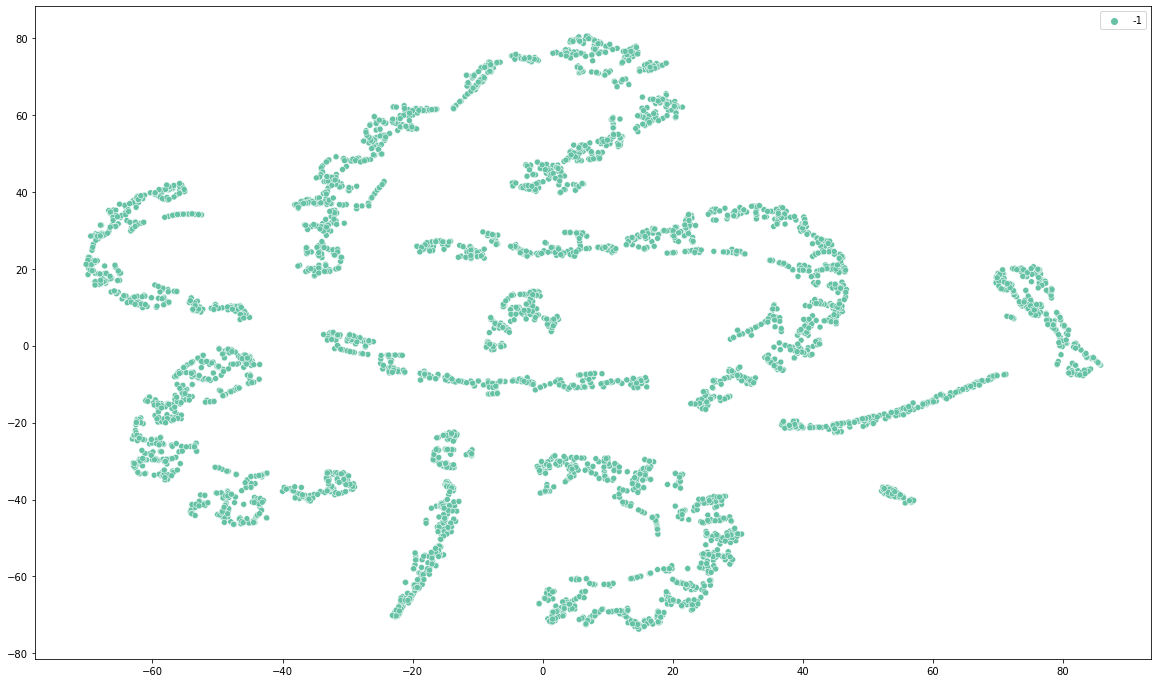

In [672]:
#DBSCAN
db_scan = DBSCAN(eps=0.6, min_samples=20).fit(tsnedata)
plt.figure(figsize=(20,12))
sns.scatterplot(x=tsnedata[:,0], y=tsnedata[:,1], hue=db_scan.labels_, palette="Set2")
plt.show()

DBSCAN, yani density based spatial clustering. Bu algoritma yüksek yoğunluklu örnekleri bulur ve bunlardan kümeleri genişleterek ilerler. Benzer yoğunlukta kümeler için iyidir. Ama bizim burada karşımıza çıkan kümelemede uygun olmadığını görüyoruz.

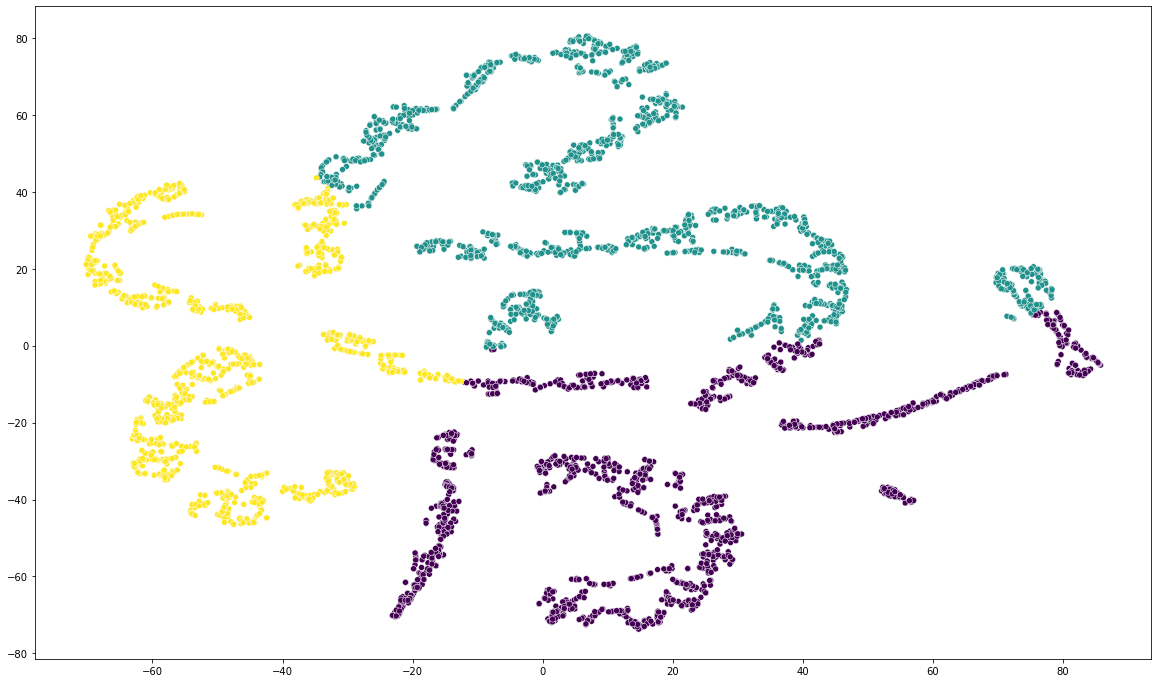

In [673]:
# Gauss mixture model
gm = GaussianMixture(n_components=3, random_state=0).fit(tsnedata)
ls = gm.predict(tsnedata)
plt.figure(figsize=(20,12))
sns.scatterplot(x=tsnedata[:,0], y=tsnedata[:,1],c=ls ,palette="Set2")
plt.show()

In [ ]:
print('Accuracy: {:.2f}'.format(gm.score(X_test, y_test)))

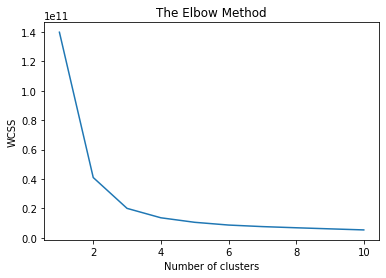

In [674]:
# K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # kümeler içi kareler toplamı
plt.show()

Elbow Method, en optimal küme sayısını belirlemek için yapılan bir işlemdir. Burada temel amaç ise küme sayısının bilinmediği veya tahmin edilemediği yerlerde 1'den başlayarak, yüksek sayılardaki küme sayılarına kadar tüm kümeleme bozulma noktalarını tespit edip, bu bozulmaların minimize olduğu yerde, dirsek durumunun oluştuğu yerdeki numaranın, küme sayısı olarak alınması esasına dayanır. O zaman grafiğe göre ben dirsek noktamı 4 veya 5 seçersem daha sonrasında değişime uğramadığı için mantıklı olmuş olur.

In [685]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [688]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

TypeError: '(array([ True,  True, False, ...,  True, False,  True]), 0)' is an invalid key

In [690]:
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 16 out of 4600 samples were correctly labeled.
Accuracy score: 0.00


##### b) Which hyperparameters need to be tuned? Explain. Find the best parameters for each approach.

Gauss Mixture Model'de küme sayısını belirtiyoruz. Ayrıca ScatterPlot ile görselleştirme yaparken de benim daha önce oluşturduğum tsnedata özelliğini kullanıyorum. Buna göre çizilme gerçekleşiyor. 

Dbscan'de ise, bir min_sample değeri veriyorum bu da çekirdek nokta olarak kabul edilecek bir nokta için bir komşuluktaki örnek sayısını verir. Ayrıca bir eps değeri de var. Bu ise, iki örnek arasındaki max mesafe. Bu zaten fix 0.5 veriliyor.

K-means algoritmasında ise, n_cluster zaten kaç tane kümeleme yapacağımın sayısı. Bunu da ben elbow method ile belirlemeyi seçtim. init parametresi ise başlatma yöntemi. iki parametre alabilir random veya k-means++. random_state centroid için rastegele bir sayı üretimi için kullanılır. 

##### c) Compare the algorithms with tuned hyperparameter based on the selected evaluation technique, numerically and visually.

##### d) Which algorithm performs the best? Can you explain why?

Gauss Mixture kesinlikle daha optimal kümelemeyi bana gösterir. Çünkü dağılım olarak birbiriyle iç içe geçmiş halde bir veri setimiz var. Ayrıca nümeric değerlerin dağılımı yönünden de bunu anlamak mümkün.
K-means datasetteki örnekleri, modelde verdiğim k kadar kümeye bölmeyi hedefler. Bu da clustering konusunda başarılı bir algoritmadır. 

### Step5:  Further Performance Improvement

##### a) Can you propose any other improvement techniques?

In [679]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
dt = DecisionTreeRegressor(max_depth=18)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=18)

coef of determination training  0.9786412579239873
coef of determination testing  0.030665036780128774

prediction
Prediction house price 1 : $ 392969.04761904763
Prediction house price 2 : $ 579243.7134503158
Prediction house price 3 : $ 299000.0
Prediction house price 4 : $ 560000.0
Prediction house price 5 : $ 713067.171554258
Prediction house price 6 : $ 250000.0
Prediction house price 7 : $ 615000.0
Prediction house price 8 : $ 1153562.5
Prediction house price 9 : $ 330675.0
Prediction house price 8 : $ 1153562.5

Real house price 1 : $ 289000.0
Real house price 2 : $ 429900.0
Real house price 3 : $ 129000.0
Real house price 4 : $ 600000.0
Real house price 5 : $ 1153562.5
Real house price 6 : $ 148000.0
Real house price 7 : $ 396500.0
Real house price 8 : $ 450000.0
Real house price 9 : $ 344500.0
Real house price 5 : $ 1153562.5

Mean Absolute Error:  11895.111474944357
Root Mean Square Error :  258707.95343099305


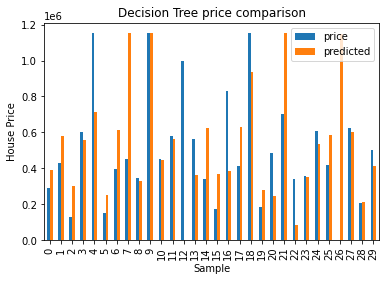

In [680]:
print('coef of determination training ',dt.score(X_train, y_train))
print('coef of determination testing ',dt.score(X_test, y_test))
print()
print('prediction')
dt_pred = list(dt.predict(X_test))
for i in dt_pred[0:10]:
  print('Prediction house price', dt_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real house price', list(y_test).index(i)+1, ': $', i)
print()
dt_mae = dt.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, dt_mae))
mse = mean_squared_error(y_test,dt_pred)
print('Root Mean Square Error : ', np.sqrt(mse))
dt_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
dt_pred_price = pd.DataFrame(dt_pred[:30], columns = ['predicted'])
dt_result = pd.concat([dt_real_price, dt_pred_price], axis=1) 
dt_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (30, 5)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

root mean squre error, Ortalama Kare Hatası tahmin edilen sonuçlarınızın gerçek sayıdan ne kadar farklı olduğuna dair size mutlak bir sayı verir. Ortalama Kare Hatasını “from sklearn.metrics import mean_squared_error” kütüphanesini ekleyerek kolay bir şekilde hesaplayabiliriz. Fonskiyonun aldığı ilk parametre gerçek değerler ikinci parametre ise bizim tahmin ettiğimiz değerler oluyor. Kök Ortalama Kare Hatası’nı hesaplarken ise karekök almak için numpy’ın sqrt fonksiyonunu kullanıyoruz.bir model veya tahmin edici tarafından tahmin edilen değerler ile gözlemlenen değerler arasındaki farkların sıklıkla kullanılan bir ölçüsüdür. verilere en iyi uyan çizgi etrafında o verilerin ne kadar yoğun olduğunu söyler

Ortalama mutlak hata, mutlak hata değerinin toplamını alır, hata terimlerinin toplamının daha doğrudan bir temsilidir.Ortalama Mutlak Hatayı “from sklearn.metrics import mean_absolute_error” kütüphanesini ekleyerek kolay bir şekilde hesaplayabiliriz. Fonksiyonun aldığı ilk parametre gerçek değerler ikinci parametre ise bizim tahmin ettiğimiz değerler oluyor. Y'ye karşı X örnekleri, tahmin edilene karşı gözlemlenene, sonraki zamana karşı ilk zamana ve bir ölçüm tekniğine karşı alternatif bir ölçüm tekniğine ilişkin karşılaştırmaları içerir.



##### b) ( + )Apply your chosen improvement techniques to your algorithm and show the results.

### Step6:  Your Comments

##### a) Give objective comments on your findings. Did you achieve your goal in the project? Explain your difficulties.

- Bu proje ödevinde hedeflediğimiz başarıya ulaşamadım. Çünkü verilerim çok fazla ve sayıca numeric değerlerimde çok olduğu için işlemleri yaparken bazı yanlış sonuçlar çıktı. Ama sonuç olarak bu dataset özelinde yaptığım ve DM algoritmaları ve ML eşliğinde gerçekleştirdiğim projemde, yapılan adımların, veri setine uygulanan işlemlerin ve modellemelerin doğru ve anlaşılır olduğuna inanıyorum. Eğer daha fazla vaktim olsaydı eminim ki Classification, Clusterin ve Regresyonadan belli başlı yaklaşımları denemek isterdim. Buradan çıkaracağım sonuç şudur ki:En son yaptığım decision tree' de çıkan sonuçlara göre, bu veri setindeki featureların hepsine bakarak bir fiyat tahmini gerçekleşti. Bazı yerlerde tahmin edilenin üzerinde price çıksa da aksine bazı yerlerde de real price'dan daha fazla tahmin edilen price çıktı. Buna göre de, aslında kullanmadığımız diğer algoirtmaların hangi veri setleri üzerinde daha iyi çalıştığını anlamak için araştırma yapmak gerekir. 

In [681]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3,1,1340.000000,7912.0,1,0,1340.0,0.000000,1955,2005
1,1.153562e+06,5,2,3650.000000,9050.0,2,4,3370.0,280.000000,1970,0
2,3.420000e+05,3,2,1930.000000,11947.0,1,0,1930.0,0.000000,1966,0
3,4.200000e+05,3,2,2000.000000,8030.0,1,0,1000.0,1000.000000,1963,0
4,5.500000e+05,4,2,2114.582353,10500.0,1,0,1140.0,304.925398,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1,1510.000000,6360.0,1,0,1510.0,0.000000,1954,1979
4596,5.343333e+05,3,2,1460.000000,7573.0,1,0,1460.0,0.000000,1983,2009
4597,4.169042e+05,3,2,3010.000000,7014.0,2,0,3010.0,0.000000,2009,0
4598,2.034000e+05,4,2,2090.000000,6630.0,1,0,1070.0,1020.000000,1974,0
